# Import necessary libraries

In [7]:
import pandas as pd
import requests
import hashlib


# Download the dataset

The dataset we would be using is called as FracAtlas available here: https://figshare.com/articles/dataset/The_dataset/22363012?file=43283628. The dataset contains a total of 4,083 X-Ray images with annotation in COCO, VGG, YOLO, and Pascal VOC format.

In [ ]:
# now we need to do EDA (explorative data analysis) of data

In [6]:
# let's check md5 sum of the file it should be this
md5_hash = hashlib.md5()
file_path = "../dataset/FracAtlas.zip"
with open(file_path, "rb") as file:
    for chunk in iter(lambda: file.read(4096), b""):
        md5_hash.update(chunk)

# Return the hex digest of the hash
print(md5_hash.hexdigest())
if md5_hash.hexdigest() == "931dd40ad6e070bb0724d66cfbbef9f0":
    print("The zip file downloaded is complete")

931dd40ad6e070bb0724d66cfbbef9f0
The zip file downloaded is complete


In [3]:


# Define the URL and the local filename to save as
url = "https://figshare.com/ndownloader/files/43283628"  # replace with your file URL
filename = "../dataset/FracAtlas.zip"  # replace with your desired filename

# Send a request to the URL
response = requests.get(url, stream=True)
response.raise_for_status()  # Check if request was successful

# Write the content to a file in chunks
with open(filename, 'wb') as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

print(f"Downloaded {filename}")


Downloaded ../dataset/file.zip


# Exploration of dataset

In [9]:
# let's unzip the data
import zipfile
import os

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall("../dataset/")


In [2]:
df = pd.read_csv("../dataset/FracAtlas/dataset.csv")
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4083 entries, 0 to 4082
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_id        4083 non-null   object
 1   hand            4083 non-null   int64 
 2   leg             4083 non-null   int64 
 3   hip             4083 non-null   int64 
 4   shoulder        4083 non-null   int64 
 5   mixed           4083 non-null   int64 
 6   hardware        4083 non-null   int64 
 7   multiscan       4083 non-null   int64 
 8   fractured       4083 non-null   int64 
 9   fracture_count  4083 non-null   int64 
 10  frontal         4083 non-null   int64 
 11  lateral         4083 non-null   int64 
 12  oblique         4083 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 414.8+ KB


In [3]:
import pandas as pd
import plotly.express as px


# Define a new DataFrame to categorize by body part, fracture, and views
categories = []
for _, row in df.iterrows():
    body_parts = []
    for part in ['hand', 'leg', 'shoulder', 'hip', 'mixed']:
        if row[part] == 1:
            body_parts.append(part)

    # Define the fracture presence
    fracture = 'Fracture' if row['fractured'] == 1 else 'No Fracture'
    
    # Count the views present
    views = []
    for view in ['frontal', 'lateral', 'oblique']:
        if row[view] == 1:
            views.append(view)
    views_str = ', '.join(views)  # Join view names as a string
    
    # Append a dictionary of this categorization
    for part in body_parts:
        categories.append({
            'Body Part': part,
            'Fracture': fracture,
            'Views': views_str
        })

# Convert to a DataFrame for plotting
df_categories = pd.DataFrame(categories)

# Create the sunburst plot
fig = px.sunburst(
    df_categories,
    path=['Body Part', 'Fracture', 'Views'],
    title="Body Parts with Fracture Status and View Types"
)

fig.show()


In [5]:
# now make a list of all images
import glob
image_paths = glob.glob("../dataset/FracAtlas/images/" + "/**/" + "*.jpg", recursive=True )
print(len(image_paths))
# now view a single image

4083


In [6]:
from PIL import Image
images = []
w = []
h =[]
# Open the image file
for i in image_paths:
    img = Image.open(i)
    # Get the size
    width, height = img.size
    images.append(i)
    w.append(width)
    h.append(height)
    print(f"Width: {width} pixels, Height: {height} pixels")


Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 454 pixels, Height: 373 pixels
Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 2304 pixels, Height: 2880 pixels
Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 373 pixels, Height: 454 pixels
Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 2304 pixels, Height: 2880 pixels
Width: 373 pixels, Height: 454 pixels
Width: 454 pixels, Height: 373 pixels
Width: 373 pixels, Height: 454 pixels
Width: 3

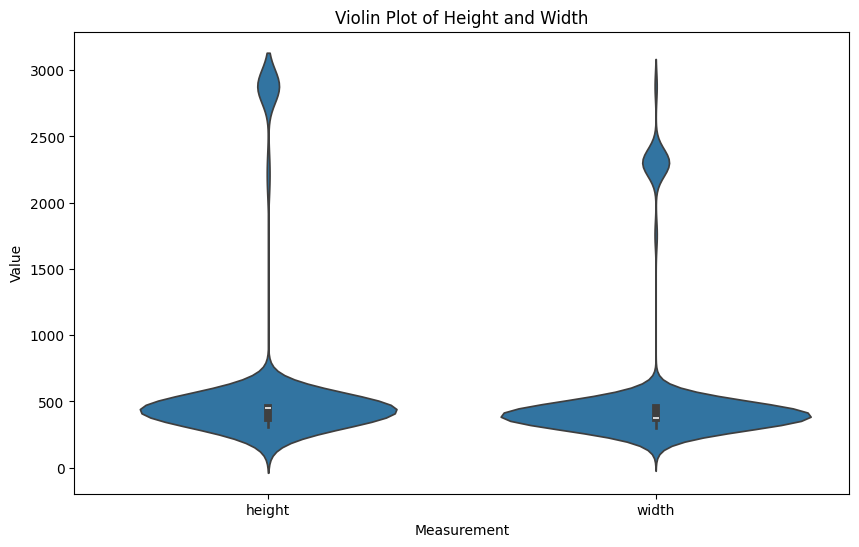

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = {"images_name" : images,
          "width" : w,
          "height" : h}
df_eda = pd.DataFrame.from_dict(df_eda)
df_eda.width.describe()

df_melted = pd.melt(df_eda, id_vars=['images_name'], value_vars=['height', 'width'], 
                    var_name='Measurement', value_name='Value')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Measurement', y='Value', data=df_melted)
plt.title("Violin Plot of Height and Width")
plt.show()